## Занятие 6
## Математический анализ
## Дифференцирование

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy
from sympy import diff, solve, nsolve, solveset, latex, S, simplify, fraction
from sympy import sin as Sin
from sympy.calculus.util import continuous_domain
%matplotlib inline

В sympy производная находится аналитически с помощью diff, эту функцию можно использовать и как метод. Покажем на примере оба варианта вызова diff.
### Пример 1
Найдем производную $f(x) = x^2 - \sin x$. 

Вначале применим diff как функцию, ее аргументы - функция или выражение и имя переменной.

В нашем примере зададим $f(x)$ как выражение.

In [2]:
from sympy.abc import x
f = x**2 - Sin(x)
diff(f, x)

2*x - cos(x)

Теперь применим diff как метод, аргумент - имя переменной:

In [3]:
f.diff(x)

2*x - cos(x)

Порядок производной является необязательным аргументом diff со значением по умолчанию 1. Для вычисления производный высоких порядков нужно указать порядок производной.

### Пример 2.
Найдем производную второго порядка для функции $f(x) = x^2 - \sin x$.

Опишем $f(x)$ как функцию. Применим diff как метод.

In [4]:
def f(x):
    return x**2 - Sin(x)
f(x).diff(x, 2)

sin(x) + 2

Для использования diff как функции делаем так:

In [5]:
diff(f(x), x, 2)

sin(x) + 2

### Пример 3. Точки экстремума
Найдем точки экстремума функции $f(x) = x^6 - 3x^4 + 3x^2 - 1$.

Вначале найдем производную функции $f(x)$, затем нули производной.

Вычислим значения производной в серединах отрезков между нулями функции и в точках, расположеных на 1 левее минимального нуля производной и правее максимального нуля производной.

По смене знаков при переходе через точку, в которой производная равна нулю, определим тип экстремума.

In [6]:
def f(x):
    return x**6 - 3*x**4 + 3*x**2 - 1
df = f(x).diff(x)
df_roots = solve(df, x)
display(df_roots)
points = [df_roots[0] - 1 ]
points.extend([(df_roots[i] + df_roots[i + 1])/2 for i in range(len(df_roots) - 1)])
points.append(df_roots[-1] + 1)                                                                
display(points)
max_arr = []
min_arr = []
for i, item in enumerate(df_roots):
    df_left = df.subs(x, points[i])
    df_right = df.subs(x, points[i + 1])
    if df_left < 0 and df_right > 0:
        min_arr.append(item)
    elif df_left > 0 and df_right < 0:
        max_arr.append(item)    
display(max_arr, min_arr)

[-1, 0, 1]

[-2, -1/2, 1/2, 2]

[]

[0]

Посмотрим на графике:

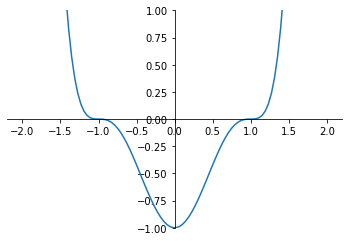

In [7]:
X = np.linspace(float(points[0]), float(points[-1]), 100)
ax = plt.gca()  
ax.plot(X, f(X))
ax.set_ylim(-1, 1)
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_position(('data', 0))
ax.spines['left'].set_position(('data', 0))

На графике видно, что у функции одна точка минимума и нет точек максимума.

### Пример 4. Точки перегиба
Найдем точки перегиба функции $f(x)$ из Примера 3.

Вначале найдем вторую производную функции $f(x)$, затем нули этой производной.

Вычислим значения второй производной в серединах отрезков между нулями функции и в точках, расположеных на 1 левее минимального нуля второй производной и правее максимального нуля второй производной.

По смене знаков при переходе через точку, в которой вторая производная равна нулю, определим, является ли точка, в которой вторая производная равна нулю, точкой перегиба.

In [8]:
df2 = f(x).diff(x, 2)
df2_roots = solve(df2, x)
df2_roots.sort() # Упорядочили корни по возрастанию
display(df2_roots)
points2 = [df2_roots[0] - 1 ]
points2.extend([(df2_roots[i] + df2_roots[i + 1])/2 for i in range(len(df2_roots) - 1)])
points2.append(df2_roots[-1] + 1)                                                                
display(points2)
inflection_arr = [item for i, item in enumerate(df2_roots) if df2.subs(x, points2[i])*df2.subs(x, points2[i + 1]) < 0]
display(inflection_arr)

[-1, -sqrt(5)/5, sqrt(5)/5, 1]

[-2, -1/2 - sqrt(5)/10, 0, sqrt(5)/10 + 1/2, 2]

[-1, -sqrt(5)/5, sqrt(5)/5, 1]

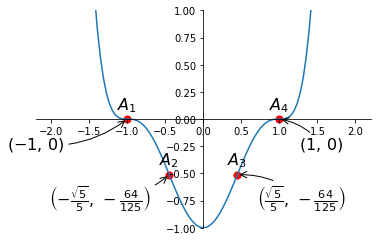

In [9]:
ax = plt.gca()  # gca stands for 'get current axis'
ax.plot(X, f(X))
ax.set_ylim(-1, 1)
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_position(('data', 0))
ax.spines['left'].set_position(('data', 0))
for i, x0 in enumerate(inflection_arr):
    f0 = f(x0)
    ax.scatter([x0],[f0], 50, color='red')
    if x0 < 0:
        XYtext = (-120, -30)
    else:    
        XYtext=(20, -30)
    ax.annotate(r'$\left(' + latex(x0) + ',\,' + latex(f0) + r'\right)$', xy=(x0, f0), xycoords='data',
             xytext=XYtext, textcoords='offset points', fontsize=16,
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))
    ax.annotate(r'$A_' + str(i + 1) + r'$', xy=(x0, f0), xycoords='data',
             xytext=(-10, 10), textcoords='offset points', fontsize=16)

## Схема анализа функции.
1. Область определения

2. Четность

3. Периодичность

4. Точки пересечения с осями координат

5. Точки экстремума

6. Точки перегиба

7. Асимптоты

8. График

### Пример 5.  Анализ функции и построение графика.
$f(x) = \frac{(x^3 - 1)\sqrt{4 - x^2}}{(2x + 1)^2}$.

###### 1. Область определения

Можно использовать continuous_domain из sympy.calculus.util

для подключения пишем

from sympy.calculus.util import continuous_domain

In [10]:
def f(x):
    return (x**3 - 1)*(4 - x**2)**(S(1)/2)/(2*x + 1)**2
D = continuous_domain(f(x), x, S.Reals)
D

Union(Interval.Ropen(-2, -1/2), Interval.Lopen(-1/2, 2))

###### 2. Четность

Проверим выполнение равенств $f(-x) = f(x)$ и $f(-x) = -f(x)$:

In [11]:
if f(-x) == f(x):
    print('Четная функция')
elif f(-x) == -f(x):
    print('Нечетная функция')   
else:
    print('Функция общего вида')

Функция общего вида


###### 3. Периодичность

Данная функция не периодическая.

###### 4. Точки пересечения с осями координат.

Используем solveset c domain=S.Reals для решения уравнения $f(x) = 0$ в вещественных числах.

In [12]:
roots = list(solveset(f(x), domain=S.Reals))
roots.sort()
roots

[-2, 1, 2]

###### 5. Точки экстремума

Находим нули производной, не забываем об области определения. Для производной данной функции solve и solveset не находят аналитическое выражение для корней, поэтому будем искать корни производной численно с помощью nsolve. Для упрощения вычислений выделим числитель производной и построим его график, чтобы с его помощью определить интервалы, на которых методом дихотомии будем искать корни производной. 

(-4*x**5 - 4*x**4 + 8*x**3 + 10*x**2 + x + 16)/(sqrt(4 - x**2)*(8*x**3 + 12*x**2 + 6*x + 1))

Union(Interval.open(-2, -1/2), Interval.open(-1/2, 2))

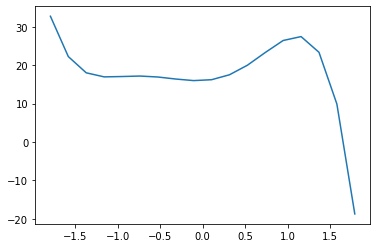

In [13]:
def df(x):
    return simplify(f(x).diff(x))
display(df(x))
df_D = continuous_domain(df(x), x, S.Reals) # Это область определения производной.
display(df_D)
X = np.linspace(-2, 2, 20)
X_df_D = [x for x in X if x in df_D] # Отбираем только точки из области определения производной.
df_num, df_denom = fraction(df(x))
df_num_Y = [df_num.subs(x, x0) for x0 in X_df_D] # Значения числителя производной в точках, где существует производная.
plt.plot(X_df_D, df_num_Y)

Найдем корень производной на отрезке $[1, 1.9]$.

In [14]:
df_root = nsolve(df_num, x, [1, 1.9], solver='bisect')
df_root

1.66805264380466

Поскольку корень числителя производной один, вычислим производную слева и справа от корня, не выходя за содержащую этот корень связную часть области определения производной. Подходящие точки 1.5 и 1.7.

In [15]:
print(df(x).subs(x, 1.5), df(x).subs(x, 1.7))

0.193411507672690 -0.0478978034980905


Производна меняет знак с + на -, поэтому 1.67 - точка максимума. Производная не существует на границе области определения в точках 2 и $-2$, при этом сама функция в указанных точках существует. Судя по знаку производной в точке 1.7, функция убывает при приближении $x$ к 2. Вычислим производную вблизи $-2$.

In [16]:
df(x).subs(x, -1.9)

-3.08144281749017

Это значит, что функция убывает и при приближении $x$ к $-2$.

###### 6. Точки перегиба

Вычисляем вторую производную, упрощаем выражение и выделяем числитель и знаменатель, находим область определения второй производной.

4*(-2*x**7 - 4*x**6 + 9*x**5 + 22*x**4 + 17*x**3 - 36*x**2 - 20*x + 95)/(sqrt(4 - x**2)*(16*x**6 + 32*x**5 - 40*x**4 - 120*x**3 - 95*x**2 - 32*x - 4))

Union(Interval.open(-2, -1/2), Interval.open(-1/2, 2))

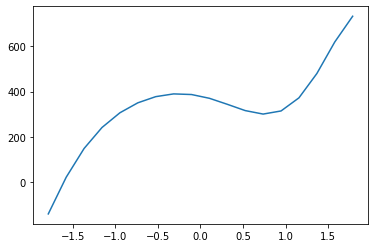

In [17]:
def df2(x):
    return simplify(f(x).diff(x, 2))
display(df2(x))
df2_D = continuous_domain(df2(x), x, S.Reals) # Это область определения производной.
display(df2_D)
X = np.linspace(-2, 2, 20)
X_df2_D = [x for x in X if x in df2_D] # Отбираем только точки из области определения производной.
df2_num, df2_denom = fraction(df2(x))
df2_num_Y = [df2_num.subs(x, x0) for x0 in X_df2_D] # Значения числителя производной в точках, где существует производная.
plt.plot(X_df2_D, df2_num_Y)

Найдем корень второй производной на отрезке $[-1.9, -1.2]$.

In [18]:
df2_root = nsolve(df2_num, x, [-1.9, -1.2], solver='bisect')
df2_root

-1.60895751263509

Поскольку корень числителя второй производной один, вычислим вторую производную слева и справа от корня, не выходя за содержащую этот корень связную часть области определения второй производной. Подходящие точки $-1.8$ и $-1.5$.

In [19]:
print(df2(x).subs(x, -1.8), df2(x).subs(x, -1.5))

4.95461617389557 -1.97250209351690


Производная меняет знак, поэтому $-1.61$ - точка перегиба. 

###### 7. Асимптоты

Возможна вертикальная асимптота в точке $-1/2$. Вычислим соответствующие пределы.

In [20]:
print(f(x).limit(x, -1/2, dir='-'), f(x).limit(x, -1/2))

-oo -oo


Значит, $x = -1/2$ - вертикальная асимптота, горизонтальных и наклонных асимптот быть не может, поскольку область определения конечна.

###### 8. График

На графике отметим точки пересечения с осями координат, точку максимума $M$, точку перегиба $P$ и вертикальную асимптоту.

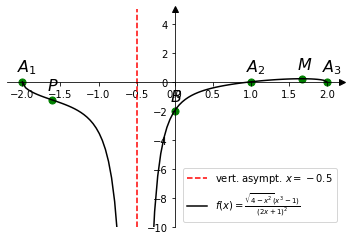

In [21]:
minY = -10  
maxY = 5
ax = plt.gca()  
ax.set_ylim(minY, maxY)   
v_as = -1/2
ax.axvline(x=v_as, color='red', linestyle='--', 
             label=r'vert. asympt. $x=' + latex(v_as) + r'$') # График вертикальной асимптоты
X = np.linspace(-2, 2, 100)
X_D = [x for x in X if x in D] 
Y_D = [f(x) for x in X if x in D] 
ax.plot(X_D, Y_D, color='black', label=r'$f(x)=' + sympy.latex(f(x)) + r'$')
roots.extend([0, float(df_root), float(df2_root)])
points_y = [float(f(point)) for point in roots]
annotations = [r'$A_1$', r'$A_2$', r'$A_3$', r'$B$', r'$M$', r'$P$']
ax.scatter(roots, points_y, 50, color='green')
for i, x0 in enumerate(roots):
    ax.annotate(annotations[i], xy=(x0, points_y[i]), xycoords='data',
             xytext=(-5, 10), textcoords='offset points', fontsize=16)
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_position(('data', 0))
ax.spines['left'].set_position(('data', 0))
ax.plot(1, 0, '>k', transform=ax.get_yaxis_transform(), clip_on=False)
ax.plot(0, 1, '^k', transform=ax.get_xaxis_transform(), clip_on=False)
ax.legend(loc='lower right')

## Немного о latex:
в latex есть необязательный параметр  mode, если его значение переключить на 'inline', то получится отдельная строчная формула, не нужно добавлять '$':

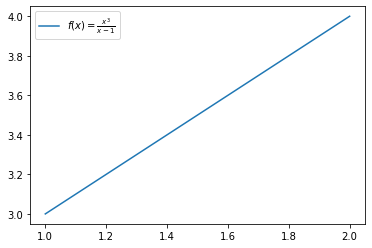

In [22]:
x = S('x')
f = x**3/(x - 1)
plt.plot([1, 2], [3, 4], label=latex(sympy.Eq(S('f(x)'), f), mode='inline'))
plt.legend()